In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import plotly.express as px
from statannotations.Annotator import Annotator
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import sys
sys.path.append('/work/Include/')
import stat_process

In [2]:
# Load the processsed data
name = 'CloudResearch-1_24.08.12'
df = pd.read_csv('/work/Processed Data/' + name + '_processed.csv')

In [3]:
df

,Unnamed: 0,index,StartDate,EndDate,Status_x,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,...,Occupation Field,Relationship/Marital Status,Political Party,Ethnicity,Gender,Country Of Residence,Household Income,Race,Employment Status,Group
0,0,2,2024-06-10 16:25:22,2024-06-10 16:36:39,IP Address,100,677,True,2024-06-10 16:36:40,R_3Tq3KIlfVrBymDk,...,Hospitality & Tourism,Single,Democrat,"No, not of Hispanic, Latino, or Spanish origin",Man,United States,"$150,000-$174,999",Filipino,Full-time,current
1,1,3,2024-06-10 16:22:15,2024-06-10 16:37:20,IP Address,100,905,True,2024-06-10 16:37:21,R_77JLXrlZNFvFjZA,...,Other,Single,Independent,"No, not of Hispanic, Latino, or Spanish origin",Woman,United States,"$50,000-$59,999",White,Part-time,current
2,2,4,2024-06-10 16:26:47,2024-06-10 16:39:38,IP Address,100,770,True,2024-06-10 16:39:38,R_1xOvnrl7kD6ysKd,...,Information Technology,Single,Independent,"No, not of Hispanic, Latino, or Spanish origin",Man,United States,"$100,000-$124,999",White,Full-time,current
3,3,5,2024-06-10 16:22:16,2024-06-10 16:39:57,IP Address,100,1060,True,2024-06-10 16:39:57,R_6i2xfeJezDf9zMB,...,Manufacturing,Single,Republican,"No, not of Hispanic, Latino, or Spanish origin",Man,United States,"$50,000-$59,999",Black or African American,Full-time,current
4,4,6,2024-06-10 16:25:01,2024-06-10 16:40:11,IP Address,100,909,True,2024-06-10 16:40:11,R_2oYYZFDVjHmNVrC,...,Information Technology,In a relationship,Something else,"No, not of Hispanic, Latino, or Spanish origin",Man,United Kingdom,"$20,000-$29,999",White,Full-time,current
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,669,693,2024-08-08 17:30:42,2024-08-08 17:46:22,IP Address,100,939,True,2024-08-08 17:46:23,R_40JjHfQYavKjN2N,...,"Science, Technology, Engineering & Mathematics",Single,Prefer not to say,"No, not of Hispanic, Latino, or Spanish origin",Man,Canada,Prefer not to say,Chinese,Full-time,new
670,670,698,2024-08-09 05:43:55,2024-08-09 06:00:07,IP Address,100,972,True,2024-08-09 06:00:08,R_1UHBs8uY4WYlH0d,...,Information Technology,Married,Democrat,"No, not of Hispanic, Latino, or Spanish origin",Man,United States,"$200,000-$224,999",White,Full-time,new
671,671,699,2024-08-09 18:43:09,2024-08-09 19:01:59,IP Address,100,1129,True,2024-08-09 19:01:59,R_196t5uDWJDsgjuF,...,Other,Single,Democrat,"No, not of Hispanic, Latino, or Spanish origin",Man,United States,"$30,000-$39,999",White,Part-time,new
672,672,700,2024-08-09 20:41:09,2024-08-09 20:51:33,IP Address,100,624,True,2024-08-09 20:51:34,R_6rp9rQAQeELF72t,...,I’d Rather Not Say,Single,Republican,"No, not of Hispanic, Latino, or Spanish origin",Man,United States,"$20,000-$29,999",White,Student,current


In [4]:
df2 = df.copy()
df2['Chatbot Frequency'] = df2['Chatbot Frequency'].fillna("Never")
df2['Session Length'] = df2['Session Length'].fillna("None")

df2['Chatbot Frequency'] = df2['Chatbot Frequency'].str.split(',')
df2['Session Length'] = df2['Session Length'].str.split(',')

df2['Use Interest'] = df2['Use Interest'].str.replace('To use it for a creative purpose (creative writing, character development, etc.)', 'Creative Purpose', regex=False)
df2['Use Interest'] = df2['Use Interest'].str.split(',')

df2['Continued Use'] = df2['Continued Use'].str.replace('To bolster self-confidence, self-esteem, etc.', 'To bolster self-confidence/self-esteem/etc.', regex=False)
df2['Continued Use'] = df2['Continued Use'].str.split(',')

df2['Chatbot Topics'] = df2['Chatbot Topics'].str.replace('Venting/talking about personal issues regarding yourself (mental health, problems you are facing)', 'Venting - personal issues', regex=False)
df2['Chatbot Topics'] = df2['Chatbot Topics'].str.replace('Venting/talking about personal issues regarding others (interpersonal drama, negative feelings towards others, etc.)', 'Venting - issues with others', regex=False)
df2['Chatbot Topics'] = df2['Chatbot Topics'].str.split(',')

df2['Pref Reason - Bot'] = df2['Pref Reason - Bot'].str.split(',')
df2['Pref Reason - Person'] = df2['Pref Reason - Person'].str.split(',')
df2['Living With'] = df2['Living With'].str.split(',')

i_s = df.columns.get_loc("Agent Pref_1")
i_e = i_s + 6 

for i in range(i_s,i_e): 
    colname = df.columns[i]
    df2[colname] = df2[colname].str.split(',')

def categorize_value(value):
    if value <= 13:
        return "Low"
    elif 14 <= value <= 20:
        return "Normal"
    elif 21 <= value <= 25:
        return "Moderate"
    else:
        return "High"

df2['Loneliness Level'] = df2['ULS-8'].apply(categorize_value)
df2

,Unnamed: 0,index,StartDate,EndDate,Status_x,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,...,Relationship/Marital Status,Political Party,Ethnicity,Gender,Country Of Residence,Household Income,Race,Employment Status,Group,Loneliness Level
0,0,2,2024-06-10 16:25:22,2024-06-10 16:36:39,IP Address,100,677,True,2024-06-10 16:36:40,R_3Tq3KIlfVrBymDk,...,Single,Democrat,"No, not of Hispanic, Latino, or Spanish origin",Man,United States,"$150,000-$174,999",Filipino,Full-time,current,Normal
1,1,3,2024-06-10 16:22:15,2024-06-10 16:37:20,IP Address,100,905,True,2024-06-10 16:37:21,R_77JLXrlZNFvFjZA,...,Single,Independent,"No, not of Hispanic, Latino, or Spanish origin",Woman,United States,"$50,000-$59,999",White,Part-time,current,High
2,2,4,2024-06-10 16:26:47,2024-06-10 16:39:38,IP Address,100,770,True,2024-06-10 16:39:38,R_1xOvnrl7kD6ysKd,...,Single,Independent,"No, not of Hispanic, Latino, or Spanish origin",Man,United States,"$100,000-$124,999",White,Full-time,current,Low
3,3,5,2024-06-10 16:22:16,2024-06-10 16:39:57,IP Address,100,1060,True,2024-06-10 16:39:57,R_6i2xfeJezDf9zMB,...,Single,Republican,"No, not of Hispanic, Latino, or Spanish origin",Man,United States,"$50,000-$59,999",Black or African American,Full-time,current,Moderate
4,4,6,2024-06-10 16:25:01,2024-06-10 16:40:11,IP Address,100,909,True,2024-06-10 16:40:11,R_2oYYZFDVjHmNVrC,...,In a relationship,Something else,"No, not of Hispanic, Latino, or Spanish origin",Man,United Kingdom,"$20,000-$29,999",White,Full-time,current,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,669,693,2024-08-08 17:30:42,2024-08-08 17:46:22,IP Address,100,939,True,2024-08-08 17:46:23,R_40JjHfQYavKjN2N,...,Single,Prefer not to say,"No, not of Hispanic, Latino, or Spanish origin",Man,Canada,Prefer not to say,Chinese,Full-time,new,Low
670,670,698,2024-08-09 05:43:55,2024-08-09 06:00:07,IP Address,100,972,True,2024-08-09 06:00:08,R_1UHBs8uY4WYlH0d,...,Married,Democrat,"No, not of Hispanic, Latino, or Spanish origin",Man,United States,"$200,000-$224,999",White,Full-time,new,Normal
671,671,699,2024-08-09 18:43:09,2024-08-09 19:01:59,IP Address,100,1129,True,2024-08-09 19:01:59,R_196t5uDWJDsgjuF,...,Single,Democrat,"No, not of Hispanic, Latino, or Spanish origin",Man,United States,"$30,000-$39,999",White,Part-time,new,Moderate
672,672,700,2024-08-09 20:41:09,2024-08-09 20:51:33,IP Address,100,624,True,2024-08-09 20:51:34,R_6rp9rQAQeELF72t,...,Single,Republican,"No, not of Hispanic, Latino, or Spanish origin",Man,United States,"$20,000-$29,999",White,Student,current,High


In [5]:
df2 = df2.rename(columns={"ULS-8": "Loneliness (ULS-8)"})
df2 = df2.rename(columns={"GPIUS2": "Problematic Use of Chatbot (GPIUS-2)"})

In [6]:
print(df2["Problematic Use of Chatbot (GPIUS-2)"].max())
print(df2["Problematic Use of Chatbot (GPIUS-2)"].min())

42.0
6.0


In [7]:
#Columns in df2
df2.columns.tolist()


['Unnamed: 0',
 'index',
 'StartDate',
 'EndDate',
 'Status_x',
 'Progress',
 'Duration (in seconds)',
 'Finished',
 'RecordedDate',
 'ResponseId',
 'DistributionChannel',
 'UserLanguage',
 'Q_RecaptchaScore',
 'Consent',
 'Quality Affirmation',
 'Usage',
 'Which Chatbots',
 'Which Chatbots_3_TEXT',
 'Chatbot Frequency',
 'Chatbot Frequency_8_TEXT',
 'Session Length',
 'Usage Timeframe',
 'Chatbot Device',
 'Chatbot Device_4_TEXT',
 'Use Interest',
 'Use Interest_6_TEXT',
 'Use Interest - FR',
 'Continued Use',
 'Continued Use_8_TEXT',
 'Continued Use - FR',
 'Chatbot Topics',
 'Chatbot Topics_7_TEXT',
 'Chatbot Topics - FR',
 'Relation Effect_1',
 'Relation Effect_2',
 'Relation Effect_3',
 'Relation Effect_4',
 'Relation Effect_5',
 'Relation Effect_6',
 'Relation Effect - FR',
 'Agent Pref_1',
 'Agent Pref_2',
 'Agent Pref_3',
 'Agent Pref_4',
 'Agent Pref_5',
 'Agent Pref_6',
 'Agent Pref - FR',
 'Pref Reason - Bot',
 'Pref Reason - Bot_7_TEXT',
 'Pref Reason - Person',
 'Pref Reas

In [8]:
def ulsPlot(df, colname, custom_order, yvar="Loneliness (ULS-8)"): 
    # Create a square figure
    plt.figure(figsize=(4, 4))

    df_exploded = df.explode(colname)
    df_exploded.reset_index(drop=True, inplace=True)
    # Create a swarm plot
    g = sns.swarmplot(data=df_exploded, x=colname, order=custom_order, y=yvar, orient='v', alpha=0.6, size=3)
    g.set_title(colname)
    g.set(ylim=(7, 33))
    g.set_xticklabels(labels=custom_order, rotation=30, ha='right')

    # Add a boxplot to the same plot
    sns.boxplot(data=df_exploded, x=colname, order=custom_order, y=yvar, 
                showcaps=False, boxprops={'facecolor': 'None'},
                showfliers=False, whiskerprops={'linewidth': 0}, ax=g)

    # Show the plot
    
    plt.show()

/root/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


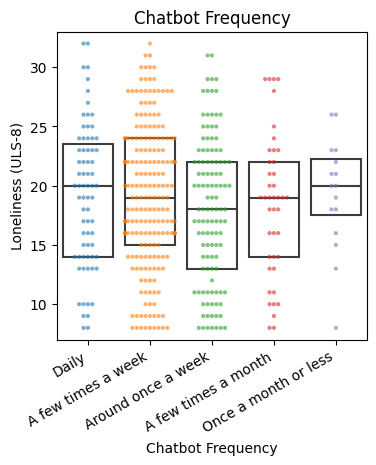

In [9]:
custom_order = ["Daily", "A few times a week", "Around once a week", "A few times a month", "Once a month or less"]

ulsPlot(df2, "Chatbot Frequency", custom_order)


/root/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 5.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


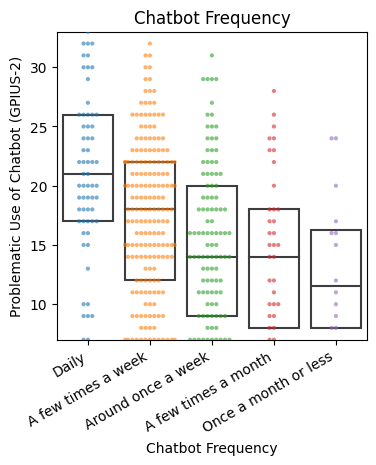

In [10]:
ulsPlot(df2, "Chatbot Frequency", custom_order, "Problematic Use of Chatbot (GPIUS-2)")

/root/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/root/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 15.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


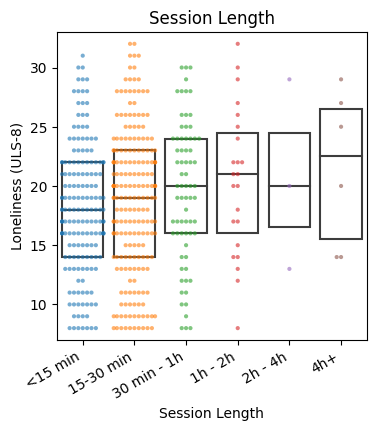

In [11]:
custom_order = ["<15 min", "15-30 min", "30 min - 1h", "1h - 2h", "2h - 4h", "4h+"]

ulsPlot(df2, "Session Length", custom_order)
    

/root/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/root/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


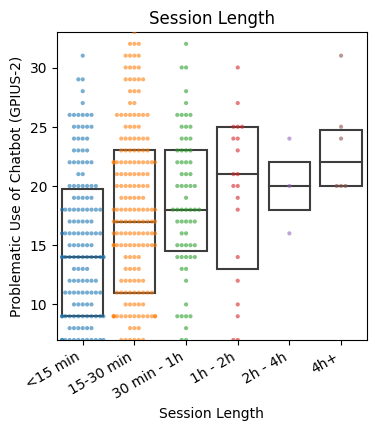

In [12]:
ulsPlot(df2, "Session Length", custom_order, "Problematic Use of Chatbot (GPIUS-2)")

/root/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/root/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/root/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 15.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/root/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 5.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/root/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; yo

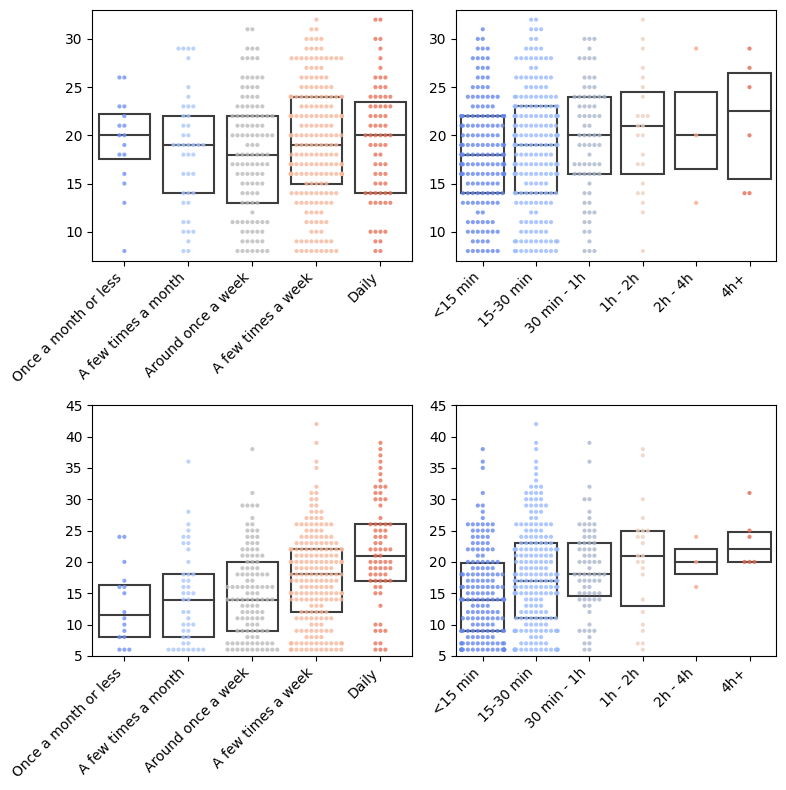

In [33]:
def create_usage_plots(df):
    # Set the style for all plots
    
    # Create custom orders
    #freq_order = ["Daily", "A few times a week", "Around once a week", "A few times a month", "Once a month or less"]
    freq_order = ["Once a month or less", "A few times a month", "Around once a week", "A few times a week", "Daily"]
    length_order = ["<15 min", "15-30 min", "30 min - 1h", "1h - 2h", "2h - 4h", "4h+"]
    
    # Create a figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(8, 8))
    
    # Function to create individual plots
    def create_subplot(data, x, order, y, ax, title):
        # Explode the data for the specific column
        df_exploded = data.explode(x)
        df_exploded.reset_index(drop=True, inplace=True)

        # Create coolwarm color palette based on number of categories
        n_colors = len(order)
        colors = sns.color_palette("coolwarm", n_colors)
    
        # Adjust brightness of colors
        darken = 0.85
        dark_colors = [(r*darken, g*darken, b*darken) for r, g, b in colors]
        colors[2:3] = dark_colors[2:3]

        # Map each category to its corresponding color
        palette_dict = dict(zip(order, colors))
        
        # Create swarm plot
        sns.swarmplot(data=df_exploded, x=x, order=order, y=y, orient='v', 
                     alpha=0.8, size=3, ax=ax, palette=palette_dict)
        
        # Add box plot
        sns.boxplot(data=df_exploded, x=x, order=order, y=y, 
                   showcaps=False, boxprops={'facecolor': 'None'},
                   showfliers=False, whiskerprops={'linewidth': 0}, ax=ax)
        
        # Customize subplot
        ax.set_title("", pad=20)
        ax.set_xticklabels(labels=order, rotation=45, ha='right')
        ax.set_xlabel("")
        ax.set_ylabel("")
        
        # Set y-axis limits based on the variable
        if y == "Loneliness (ULS-8)":
            ax.set(ylim=(7, 33))
        elif y == "Problematic Use of Chatbot (GPIUS-2)":
            ax.set(ylim=(5, 45))  # Adjust these limits as needed
    
    # Create each subplot
    # Top row: Loneliness plots
    create_subplot(df, "Chatbot Frequency", freq_order, "Loneliness (ULS-8)", 
                  axes[0,0], "Loneliness vs. Chatbot Frequency")
    create_subplot(df, "Session Length", length_order, "Loneliness (ULS-8)", 
                  axes[0,1], "Loneliness vs. Session Length")
    
    # Bottom row: GPIUS-2 plots
    create_subplot(df, "Chatbot Frequency", freq_order, "Problematic Use of Chatbot (GPIUS-2)", 
                  axes[1,0], "Problematic Use vs. Chatbot Frequency")
    create_subplot(df, "Session Length", length_order, "Problematic Use of Chatbot (GPIUS-2)", 
                  axes[1,1], "Problematic Use vs. Session Length")
    
    # Adjust layout
    plt.tight_layout()
    
    # Create output directory if it doesn't exist
    #os.makedirs("/work/Output Figures", exist_ok=True)
    
    # Save the figure
    fig.savefig("/work/Output Figures/usageplots.pdf", 
                bbox_inches='tight', 
                dpi=300)
    
    plt.show()

# Usage:
create_usage_plots(df2)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def ulsPlot(df, colname, custom_order, ax, title):
    df_exploded = df.explode(colname)
    df_exploded.reset_index(drop=True, inplace=True)
    
    # Create a swarm plot
    g = sns.swarmplot(data=df_exploded, x=colname, order=custom_order, y="Loneliness (ULS-8)", orient='v', alpha=0.3, size=2, ax=ax, color='black')
    g.set_title(title, fontsize=14, pad=20)
    g.set(ylim=(7, 33))
    g.set_xticklabels(labels=custom_order, rotation=45, ha='right')
    
    # Increase font size of axis labels and tick labels
    g.set_xlabel(colname, fontsize=14)
    g.set_ylabel("Loneliness (ULS-8)", fontsize=14)
    plt.setp(ax.get_xticklabels(), fontsize=14)
    plt.setp(ax.get_yticklabels(), fontsize=14)

    # Add a boxplot to the same plot
    sns.boxplot(data=df_exploded, x=colname, order=custom_order, y="Loneliness (ULS-8)", 
                showcaps=False, boxprops={'facecolor': 'None'},
                showfliers=False, whiskerprops={'linewidth': 0}, ax=g)

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

# Plot Chatbot Frequency
custom_order_freq = ["Once a month or less", "A few times a month", "Around once a week", "A few times a week", "Daily"]
ulsPlot(df2, "Chatbot Frequency", custom_order_freq, ax1, 'Chatbot Frequency and Loneliness (ULS-8)')

# Plot Session Length
custom_order_length = ["<15 min", "15-30 min", "30 min - 1h", "1h - 2h", "2h - 4h", "4h+"]
ulsPlot(df2, "Session Length", custom_order_length, ax2, 'Chatbot Session Length and Loneliness (ULS-8)')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the figure
plt.savefig("/work/Output Figures/frequency-and-session-length-ULS8.pdf", format="pdf", bbox_inches="tight")
plt.close()  # Close the figure to free up memory

print("The combined plot has been saved as 'frequency-and-session-length-ULS8.pdf'")


The combined plot has been saved as 'frequency-and-session-length-ULS8.pdf'


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def ulsPlot(df, colname, custom_order, ax, title):
    df_exploded = df.explode(colname)
    df_exploded.reset_index(drop=True, inplace=True)
    
    # Create a swarm plot
    g = sns.swarmplot(data=df_exploded, x=colname, order=custom_order, y="Problematic Use of Chatbot (GPIUS-2)", orient='v', alpha=0.3, size=2, ax=ax, color='black')
    g.set_title(title, fontsize=14, pad=20)
    g.set_xticklabels(labels=custom_order, rotation=45, ha='right')
    
    # Increase font size of axis labels and tick labels
    g.set_xlabel(colname, fontsize=12)
    g.set_ylabel("Problematic Use of Chatbot (GPIUS-2)", fontsize=14)
    plt.setp(ax.get_xticklabels(), fontsize=14)
    plt.setp(ax.get_yticklabels(), fontsize=14)

    # Add a boxplot to the same plot
    sns.boxplot(data=df_exploded, x=colname, order=custom_order, y="Problematic Use of Chatbot (GPIUS-2)", 
                showcaps=False, boxprops={'facecolor': 'None'},
                showfliers=False, whiskerprops={'linewidth': 0}, ax=g)

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

# Plot Chatbot Frequency
custom_order_freq = ["Once a month or less", "A few times a month", "Around once a week", "A few times a week", "Daily"]
ulsPlot(df2, "Chatbot Frequency", custom_order_freq, ax1, 'Chatbot Frequency and Problematic Use of Chatbot (GPIUS-2)')

# Plot Session Length
custom_order_length = ["<15 min", "15-30 min", "30 min - 1h", "1h - 2h", "2h - 4h", "4h+"]
ulsPlot(df2, "Session Length", custom_order_length, ax2, 'Chatbot Session Length and Problematic Use of Chatbot (GPIUS-2)')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the figure
plt.savefig("/work/Output Figures/frequency-and-session-length-GPIUS2.pdf", format="pdf", bbox_inches="tight")
plt.close()  # Close the figure to free up memory

print("The combined plot has been saved as 'frequency-and-session-length-GPIUS2.pdf'")

The combined plot has been saved as 'frequency-and-session-length-GPIUS2.pdf'


In [16]:
df2['Session Length'].value_counts()

[None]                                                      270
[15-30 min]                                                 157
[<15 min]                                                   135
[30 min - 1h]                                                45
[<15 min, 15-30 min]                                         23
[1h - 2h]                                                    13
[15-30 min, 30 min - 1h]                                     10
[<15 min, 15-30 min, 30 min - 1h]                             5
[30 min - 1h, 1h - 2h]                                        5
[4h+]                                                         3
[15-30 min, 30 min - 1h, 1h - 2h]                             2
[<15 min, 15-30 min, 30 min - 1h, 1h - 2h, 2h - 4h, 4h+]      1
[<15 min, 15-30 min, 30 min - 1h, 1h - 2h]                    1
[30 min - 1h, 1h - 2h, 2h - 4h, 4h+]                          1
[2h - 4h]                                                     1
[<15 min, 30 min - 1h]                  